In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [160]:
# Load dataset
file_path = './medianprices.csv'
median_data = pd.read_csv(file_path)

In [161]:
# identifying the missing data
missing_values = median_data.isnull().sum()

print(missing_values)

Year              0
No. of Sales      0
Median Price      0
Mean Price        0
No. of Sales.1    0
Median Price.1    0
Mean Price.1      0
No. of Sales.2    0
Median Price.2    0
Mean Price.2      0
dtype: int64


In [162]:
median_data.dropna()

# identifying the missing data
missing_values = median_data.isnull().sum()

print(missing_values)

Year              0
No. of Sales      0
Median Price      0
Mean Price        0
No. of Sales.1    0
Median Price.1    0
Mean Price.1      0
No. of Sales.2    0
Median Price.2    0
Mean Price.2      0
dtype: int64


/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_20232/1830583475.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


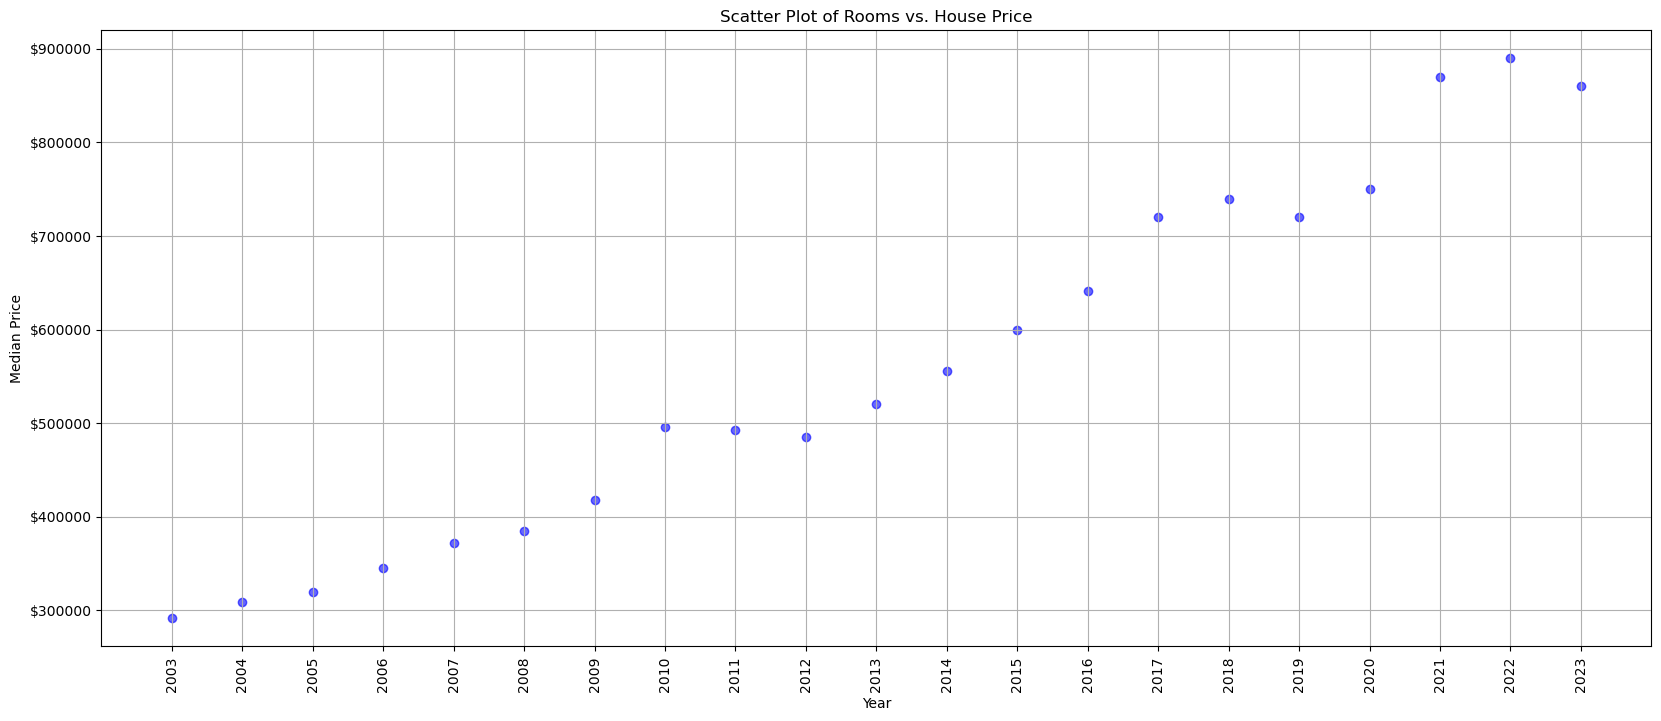

In [163]:
median_data = median_data[median_data.Year != 2024]

median_data['Year'] = median_data['Year'].astype(str)

plt.figure(figsize=(20, 8))
plt.scatter(median_data['Year'], median_data['Median Price'], alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()

<Axes: xlabel='Year'>

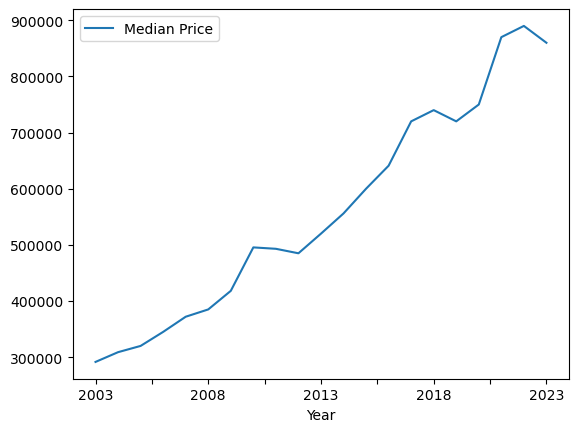

In [164]:
median_data.plot.line(y="Median Price", x="Year")

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_20232/2310721256.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


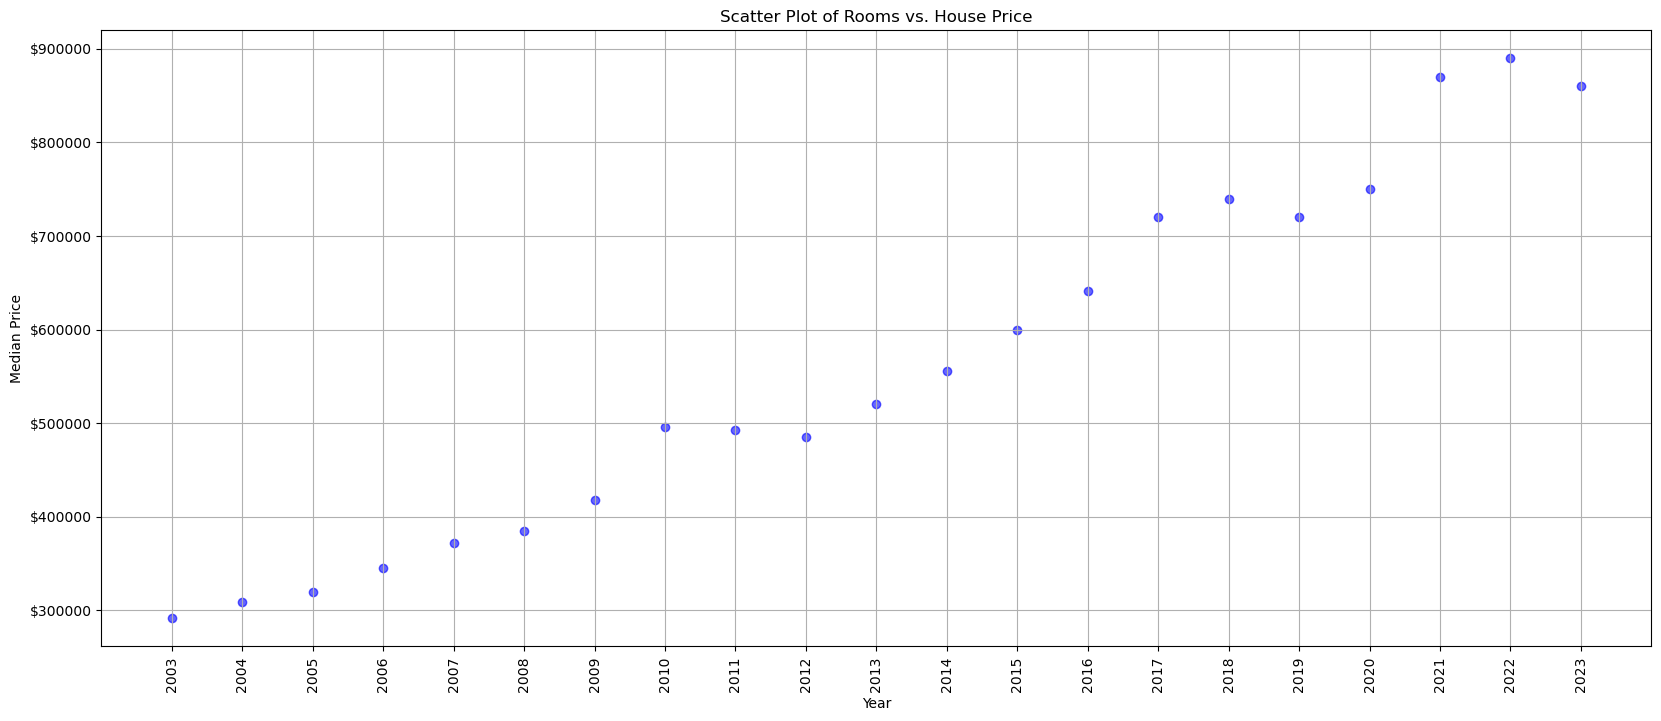

In [165]:
median_data = median_data[median_data.Year != 2024]

median_data['Year'] = median_data['Year'].astype(str)

median_data['Next Year'] = median_data['Median Price'].shift(-1)


plt.figure(figsize=(20, 8))
plt.scatter(median_data['Year'], median_data['Median Price'], alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()

/var/folders/04/zc8l2qbd6pg6znw0k93vpplw0000gn/T/ipykernel_20232/1617745492.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])


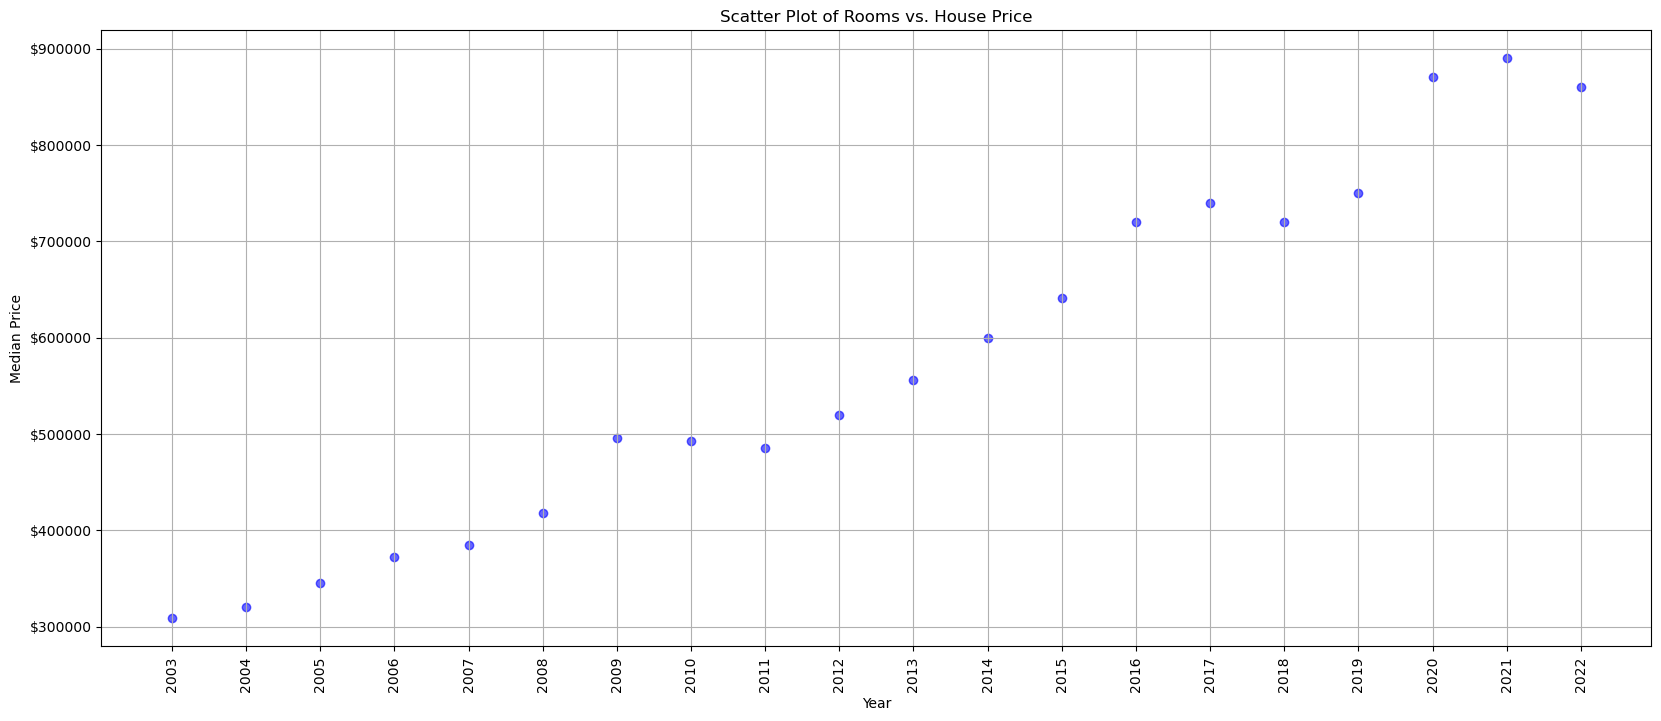

In [166]:
median_data = median_data[median_data.Year != 2024]

median_data['Year'] = median_data['Year'].astype(str)

median_data['NextYear'] = median_data['Median Price'].shift(-1)


plt.figure(figsize=(20, 8))
plt.scatter(median_data['Year'], median_data['NextYear'], alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()

In [167]:
median_data['Change'] = median_data['NextYear'] > median_data['Median Price']

median_data

,Year,No. of Sales,Median Price,Mean Price,No. of Sales.1,Median Price.1,Mean Price.1,No. of Sales.2,Median Price.2,Mean Price.2,Next Year,NextYear,Change
0,2003,61370,291500,361584,30614,271500,318433,22177,117000,126084,308869.0,308869.0,True
1,2004,53796,308869,381614,26087,275000,323111,12999,135000,144974,320000.0,320000.0,True
2,2005,56847,320000,399974,29089,285000,332408,13331,137000,146842,345000.0,345000.0,True
3,2006,55172,345000,439673,30837,305000,364847,14768,139000,153139,372000.0,372000.0,True
4,2007,66461,372000,503370,42247,340000,408437,20424,143900,155663,385000.0,385000.0,True
5,2008,52125,385000,510272,32068,355000,407357,16166,152000,161795,418100.0,418100.0,True
6,2009,60061,418100,540086,40965,385000,436008,22634,166000,174726,495500.0,495500.0,True
7,2010,55462,495500,636509,39924,448250,507647,19560,190000,206051,493000.0,493000.0,False
8,2011,48934,493000,633431,34100,445000,504111,12331,210766,227228,485000.0,485000.0,False
9,2012,47571,485000,618309,33779,436500,492145,10219,210000,226861,520000.0,520000.0,True


In [168]:
median_data['Change'].value_counts()

Change
True     16
False     5
Name: count, dtype: int64

In [169]:
prediction = 'Median Price'
target = 'Change'

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [181]:
median_data.rename(columns={'Median Price': 'MedianPrice'}, inplace=True)

tp_df = pd.DataFrame(median_data.MedianPrice)
tp_df.drop(tp_df.tail(1).index,inplace=True) # drop last n rows
print(tp_df)

tt_df = pd.DataFrame(median_data.NextYear)
tt_df.drop(tt_df.tail(1).index,inplace=True) # drop last n rows
print(tt_df)




    MedianPrice
0        291500
1        308869
2        320000
3        345000
4        372000
5        385000
6        418100
7        495500
8        493000
9        485000
10       520000
11       556000
12       600000
13       641000
14       720000
15       740000
16       720000
17       750000
18       870000
19       890000
    NextYear
0   308869.0
1   320000.0
2   345000.0
3   372000.0
4   385000.0
5   418100.0
6   495500.0
7   493000.0
8   485000.0
9   520000.0
10  556000.0
11  600000.0
12  641000.0
13  720000.0
14  740000.0
15  720000.0
16  750000.0
17  870000.0
18  890000.0
19  860000.0


In [190]:
rf = RandomForestClassifier(min_samples_split=10, random_state=1)

rf.fit(tp_df, tt_df)

pred = rf.predict(tp_df)

rf.score(tp_df, tt_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.65

In [191]:
pred

array([320000., 320000., 345000., 372000., 418100., 418100., 495500.,
       520000., 485000., 520000., 556000., 600000., 720000., 720000.,
       720000., 720000., 720000., 720000., 890000., 860000.])

ValueError: x and y must be the same size

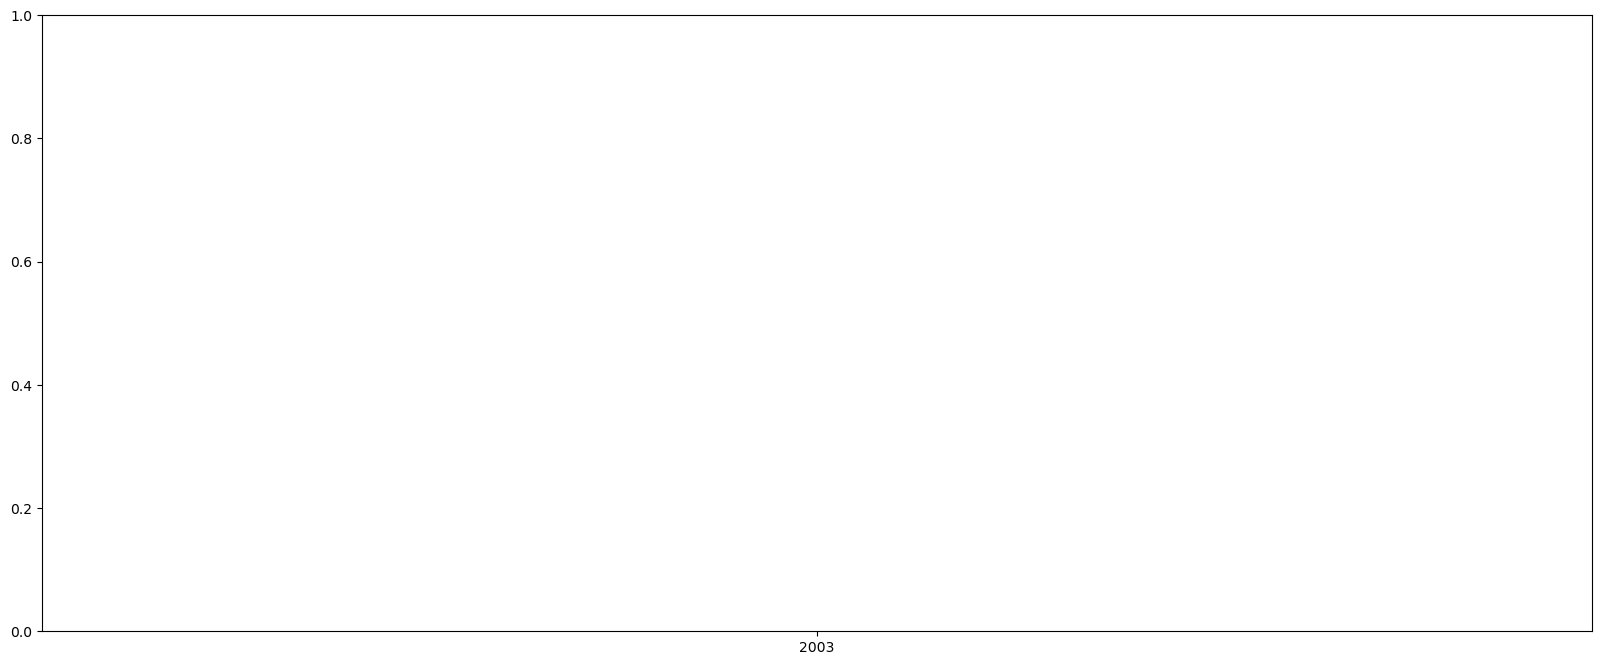

In [187]:
plt.figure(figsize=(20, 8))
plt.scatter(median_data['Year'], pred, alpha=0.6, color='b')
plt.title('Scatter Plot of Rooms vs. House Price')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.show()